Silicon nano-sphere
============================

Comparing pyGDM to Mie theory for a silicon nano-sphere (D=150nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Si_D150nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

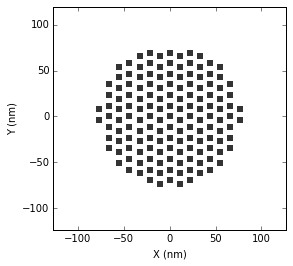

(hex) ----- N_dipoles = 1159


In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 50))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)

scale_factor = 1.4
step = 18.75/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.silicon()
n1, n2 = 1.0, 1.0     # vacuum env.

struct = structures.struct(step, geometry, material, n1,n2, 
                                   structures.get_normalization('hex'))


sim = core.simulation(struct, efield)

visu.structure(sim)
print '(hex) ----- N_dipoles =', len(sim.struct.geometry),

Run the simulation
--------------------------

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

timing 300.00nm:     1238.5 ms
timing 307.46nm:     1323.2 ms
timing 315.11nm:     1303.7 ms
timing 322.95nm:     1084.7 ms
timing 330.98nm:     1383.2 ms
timing 339.22nm:     1250.8 ms
timing 347.65nm:     1415.0 ms
timing 356.30nm:     2052.5 ms
timing 365.17nm:     2285.0 ms
timing 374.25nm:     2456.2 ms
timing 383.56nm:     1944.6 ms
timing 393.10nm:     1647.2 ms
timing 402.88nm:     1641.0 ms
timing 412.90nm:     1292.6 ms
timing 423.17nm:     1476.1 ms
timing 433.70nm:     1350.0 ms
timing 444.49nm:     1416.9 ms
timing 455.54nm:     1438.4 ms
timing 466.87nm:     1300.1 ms
timing 478.49nm:     1173.7 ms
timing 490.39nm:     1100.5 ms
timing 502.59nm:     2493.6 ms
timing 515.09nm:     3159.1 ms
timing 527.90nm:     1439.3 ms
timing 541.03nm:     1094.1 ms
timing 554.49nm:     1108.5 ms
timing 568.29nm:     1072.5 ms
timing 582.42nm:     1092.6 ms
timing 596.91nm:     1166.4 ms
timing 611.76nm:     1085.2 ms
timing 626.98nm:     1105.6 ms
timing 642.57nm:     2248.3 ms
timing 6

Plot the spectrum
---------------------------

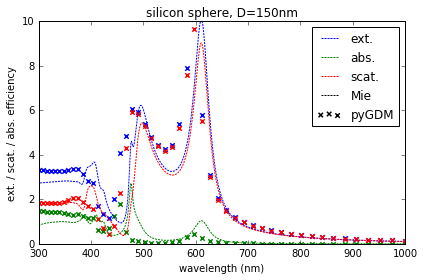

In [4]:
plt.figure()
plt.title("silicon sphere, D=150nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 10] )


plt.tight_layout()
plt.show()

The agreement with Mie theory is ok but not ideal. This can be easily improved by increasing the number of meshpoints (see our paper), which increases of course the simulation time, for which reason we stick to a coarser mesh for this demonstration.